In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
base_dir = '/content/drive/MyDrive/PTSMP1'
!ls"/content/drive/MyDrive/PTSMP1"

/bin/bash: line 1: ls/content/drive/MyDrive/PTSMP1: No such file or directory


In [ ]:
bahan_dir = os.path.join(base_dir, 'Bahan')
train_dir = os.path.join(base_dir, 'Latih')
validation_dir = os.path.join(base_dir, 'Validasi')

In [ ]:
cats_dir = os.path.join(base_dir, '/content/drive/MyDrive/PTSMP1/Bahan/cats')
dogs_dir = os.path.join(base_dir, '/content/drive/MyDrive/PTSMP1/Bahan/dogs')

print("Jumlah Data Train Dalam Tiap Kelas")
print('Jumlah gambar anjing :', len(os.listdir(dogs_dir)))
print('Jumlah gambar kucing :', len(os.listdir(cats_dir)))

Jumlah Data Train Dalam Tiap Kelas
Jumlah gambar anjing : 50
Jumlah gambar kucing : 50


In [ ]:
train_dogs = os.path.join(train_dir, '/content/drive/MyDrive/PTSMP1/Bahan/dogs')
train_cats = os.path.join(train_dir, '/content/drive/MyDrive/PTSMP1/Bahan/cats')

validation_dogs = os.path.join(validation_dir, '/content/drive/MyDrive/PTSMP1/Bahan/dogs')
validation_cats = os.path.join(validation_dir, '/content/drive/MyDrive/PTSMP1/Bahan/cats')

In [ ]:
import os
import random
from shutil import copyfile

def ensure_dir(directory):
    """Membuat direktori jika belum ada."""
    if not os.path.exists(directory):
        os.makedirs(directory)

def train_val_split(source, train, val, train_ratio):
    """Membagi dataset ke dalam folder train dan validation."""
    ensure_dir(train)
    ensure_dir(val)

    total_size = len(os.listdir(source))
    train_size = int(train_ratio * total_size)

    randomized = random.sample(os.listdir(source), total_size)
    train_files = randomized[:train_size]
    val_files = randomized[train_size:]

    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        copyfile(i_file, destination)

    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)
        copyfile(i_file, destination)

train_ratio = 0.9


dogs_dir = "/content/drive/MyDrive/PTSMP1/Bahan/dogs"
train_dogs = "/content/drive/MyDrive/PTSMP1/Latih/dogs"
validation_dogs = "/content/drive/MyDrive/PTSMP1/Validasi/dogs"

train_val_split(dogs_dir, train_dogs, validation_dogs, train_ratio)


cats_dir = "/content/drive/MyDrive/PTSMP1/Bahan/cats"
train_cats = "/content/drive/MyDrive/PTSMP1/Latih/cats"
validation_cats = "/content/drive/MyDrive/PTSMP1/Validasi/cats"

train_val_split(cats_dir, train_cats, validation_cats, train_ratio)


In [ ]:
print('Jumlah All CAT :', len(os.listdir(cats_dir)))
print('Jumlah Train CAT :', len(os.listdir(train_cats)))
print('Jumlah Vall CAT :', len(os.listdir(validation_cats)))

Jumlah All CAT : 100
Jumlah Train CAT : 93
Jumlah Vall CAT : 29


In [ ]:
print('Jumlah All DOG :', len(os.listdir(dogs_dir)))
print('Jumlah Train DOG :', len(os.listdir(train_dogs)))
print('Jumlah Vall DOG :', len(os.listdir(validation_dogs)))

Jumlah All DOG : 100
Jumlah Train DOG : 93
Jumlah Vall DOG : 41


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2
)

In [ ]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 186 images belonging to 2 classes.
Found 69 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print('\nAkurasi mencapai 99%')
            self.model.stop_training = True

callbacks = myCallback()


In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),

    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),

    tf.keras.layers.Dense(2, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs=300,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 442ms/step - accuracy: 0.8198 - loss: 0.4541 - val_accuracy: 1.0000 - val_loss: 0.2245
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 465ms/step - accuracy: 0.6403 - loss: 0.5534 - val_accuracy: 0.7000 - val_loss: 0.5138
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 959ms/step - accuracy: 0.8155 - loss: 0.4055 - val_accuracy: 0.9000 - val_loss: 0.2103
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.7194 - loss: 0.5347 - val_accuracy: 0.7000 - val_loss: 0.4220
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.7152 - loss: 0.4641 - val_accuracy: 0.8000 - val_loss: 0.3534
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.6778 - loss: 0.5224 - val_accuracy: 0.7000 - val_loss: 0.4584
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step - accuracy: 0.7593 - loss: 0.4235 - val_accuracy: 0.9000 - val_loss: 0.2968
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 386ms/step - accuracy: 0.7125 - loss: 0.4782 - val_accuracy: 0.8000 - 

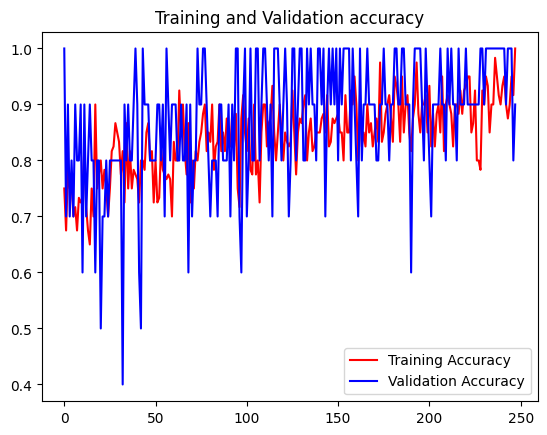

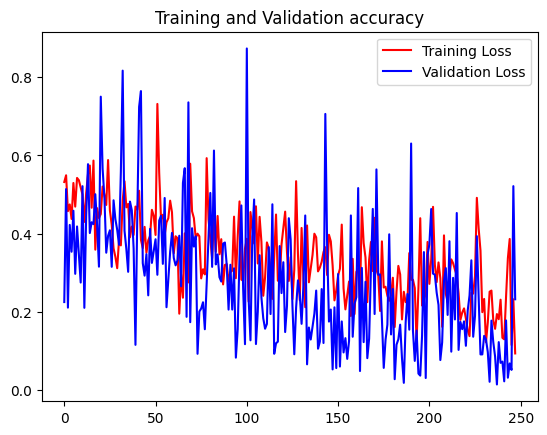

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = x

    classes = model.predict(images, batch_size=10)

    print(fn)

    class_list = os.listdir(train_dir)

    for j in range(len(class_list)):
        if classes[0][j] == max(classes[0]):
            print('This Image belongs to class', class_list[j-1])
            break